# Librerie

In [1]:
# librerie
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn
from datetime import datetime, timedelta

<ipython-input-1-2a6c0979a53b>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# Input

In [2]:
'''
def convert_yield_to_price(yield_annual, durata_residua=10):
    yield_periodic = (1 + yield_annual / 100) ** (1 / 252) - 1  # Converti in rendimento giornaliero
    n_days = durata_residua * 252  # Numero totale di giorni
    price = sum([1 / (1 + yield_periodic) ** t for t in range(1, n_days+1)]) + 1 / (1 + yield_periodic) ** n_days
    return price

# input
titoli = [['^GSPC','S&P500'],['^TNX','Obbligazioni USA 10y']]
tickers = [l[0] for l in titoli]
nomi = [l[1] for l in titoli]
b = ['^TNX']
durata = 10

# carica dati
prezzi = yf.download(tickers)['Adj Close']
rend = np.log(prezzi/prezzi.shift(1)).dropna()
rend = rend.reindex(tickers,axis=1)

prezzi[b] = pd.DataFrame(prezzi[b].apply(lambda yield_annual: convert_yield_to_price(yield_annual)))
rend[b] = np.log(prezzi[b]/prezzi[b].shift(1)).dropna()
'''

"\ndef convert_yield_to_price(yield_annual, durata_residua=10):\n    yield_periodic = (1 + yield_annual / 100) ** (1 / 252) - 1  # Converti in rendimento giornaliero\n    n_days = durata_residua * 252  # Numero totale di giorni\n    price = sum([1 / (1 + yield_periodic) ** t for t in range(1, n_days+1)]) + 1 / (1 + yield_periodic) ** n_days\n    return price\n\n# input\ntitoli = [['^GSPC','S&P500'],['^TNX','Obbligazioni USA 10y']]\ntickers = [l[0] for l in titoli]\nnomi = [l[1] for l in titoli]\nb = ['^TNX']\ndurata = 10\n\n# carica dati\nprezzi = yf.download(tickers)['Adj Close']\nrend = np.log(prezzi/prezzi.shift(1)).dropna()\nrend = rend.reindex(tickers,axis=1)\n\nprezzi[b] = pd.DataFrame(prezzi[b].apply(lambda yield_annual: convert_yield_to_price(yield_annual)))\nrend[b] = np.log(prezzi[b]/prezzi[b].shift(1)).dropna()\n"

In [3]:
# input
titoli = [['VFINX','S&P500'],['VUSTX','Obbligazioni USA a lungo termine']]
tickers = [l[0] for l in titoli]
nomi = [l[1] for l in titoli]
durata = 10

# carica dati
prezzi = yf.download(tickers)['Adj Close']
rend = np.log(prezzi/prezzi.shift(1)).dropna()
rend = rend.reindex(tickers,axis=1)

[*********************100%%**********************]  2 of 2 completed


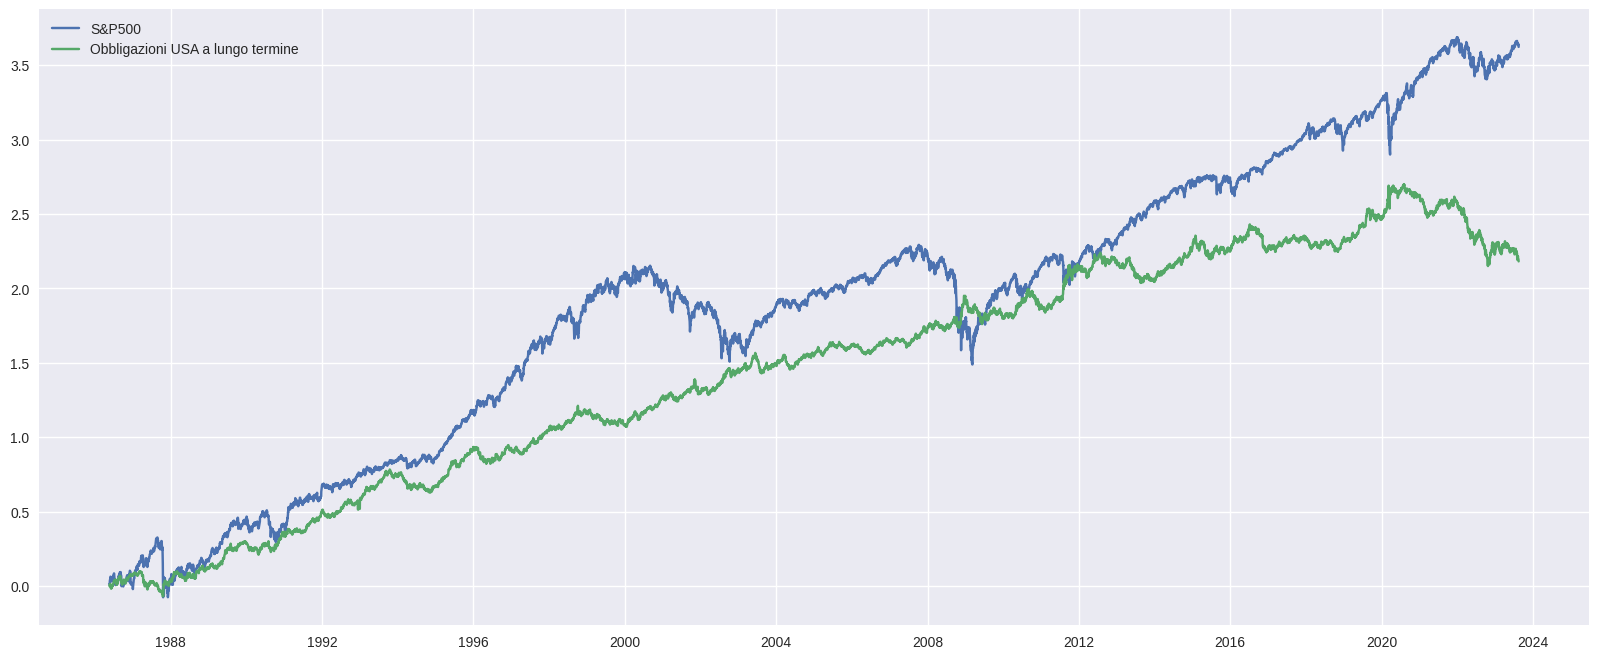

In [4]:
plt.figure(figsize=(20,8))
plt.plot(rend.cumsum(), label=nomi)
plt.legend()
plt.show()

In [5]:
yrend = rend.resample('A').sum()
#yrend.index = yrend.index.year
yrend = yrend[yrend[tickers[0]]<0]

In [6]:
yrend[tickers[0]]

Date
1986-12-31   -0.021660
1990-12-31   -0.034070
2000-12-31   -0.094870
2001-12-31   -0.128230
2002-12-31   -0.250620
2008-12-31   -0.462402
2018-12-31   -0.046526
2022-12-31   -0.201436
Name: VFINX, dtype: float64

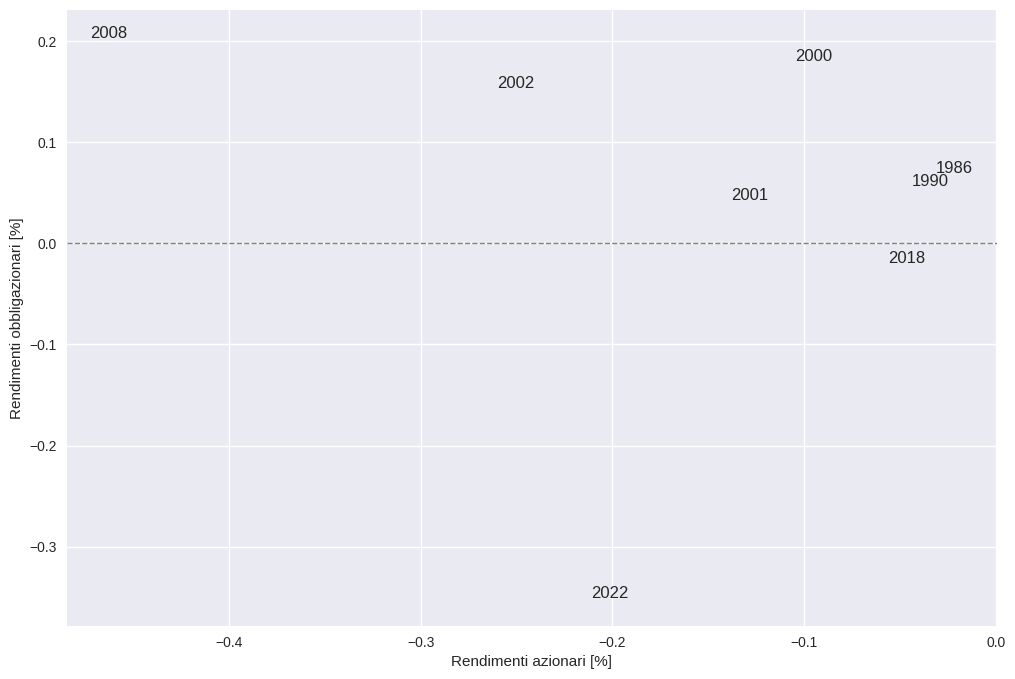

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(yrend.iloc[:,0],yrend.iloc[:,1],s=0)
plt.xlabel('Rendimenti azionari [%]')
plt.ylabel('Rendimenti obbligazionari [%]')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
#plt.axvline(0, color='gray', linestyle='--', linewidth=1)
for date, row in yrend.iterrows():
    plt.text(row[0], row[1], date.strftime('%Y'), fontsize=12, ha='center')
plt.show()

In [8]:
def max_drawdown(returns):
    wealth = (1 + returns).cumprod()
    previous_peaks = wealth.cummax()
    drawdowns = (wealth - previous_peaks) / previous_peaks
    return np.min(drawdowns,axis=0)

In [9]:
#backtest per periodo
periodo = rend.index
maxyear = rend.index.year.max()
indice = [g for g in periodo if g.year<=maxyear-durata]
rendimenti = []
stdev = []
correlazione = []
_90_10 = []
_80_20 = []
_70_30 = []
_60_40 = []
_50_50 = []
max_dd_100_0 = []
max_dd_90_10 = []
max_dd_80_20 = []
max_dd_70_30 = []
max_dd_60_40 = []
max_dd_50_50 = []
for i in indice:
  r = rend[(rend.index>=i) & (rend.index<i+pd.DateOffset(years=durata))]
  rr = r.mean()*252
  ds = np.std(r)*np.sqrt(252)
  correl = r.corr()
  correl = correl.at[tickers[0],tickers[1]]
  rendimenti.append(rr)
  stdev.append(ds)
  correlazione.append(correl)
  max_dd_100_0.append(max_drawdown(r.iloc[:,0]))
  r_90_10 = r @ [0.90,0.10]
  max_dd_90_10.append(max_drawdown(r_90_10))
  _90_10.append(r_90_10.mean()*252)
  r_80_20 = r @ [0.80,0.20]
  _80_20.append(r_80_20.mean()*252)
  max_dd_80_20.append(max_drawdown(r_80_20))
  r_70_30 = r @ [0.70,0.30]
  _70_30.append(r_70_30.mean()*252)
  max_dd_70_30.append(max_drawdown(r_70_30))
  r_60_40 = r @ [0.60,0.40]
  _60_40.append(r_60_40.mean()*252)
  max_dd_60_40.append(max_drawdown(r_60_40))
  r_50_50 = r @ [0.50,0.50]
  _50_50.append(r_50_50.mean()*252)
  max_dd_50_50.append(max_drawdown(r_50_50))

In [10]:
risultati = {
    'Rendimento S&P500': [item[0] for item in rendimenti],
    'Rendimento US Bonds': [item[1] for item in rendimenti],
    'Volatilità S&P500': [item[0] for item in stdev],
    'Volatilità US Bonds': [item[1] for item in stdev],
    'Correlazione': correlazione,
    '90 10': _90_10,
    '80 20': _80_20,
    '70 30': _70_30,
    '60 40': _60_40,
    '50 50': _50_50,
    'Drawdown 100 0': max_dd_100_0,
    'Drawdown 90 10': max_dd_90_10,
    'Drawdown 80 20': max_dd_80_20,
    'Drawdown 70 30': max_dd_70_30,
    'Drawdown 60 40': max_dd_60_40,
    'Drawdown 50 50': max_dd_50_50,
}
risultati = pd.DataFrame(risultati, index=indice)

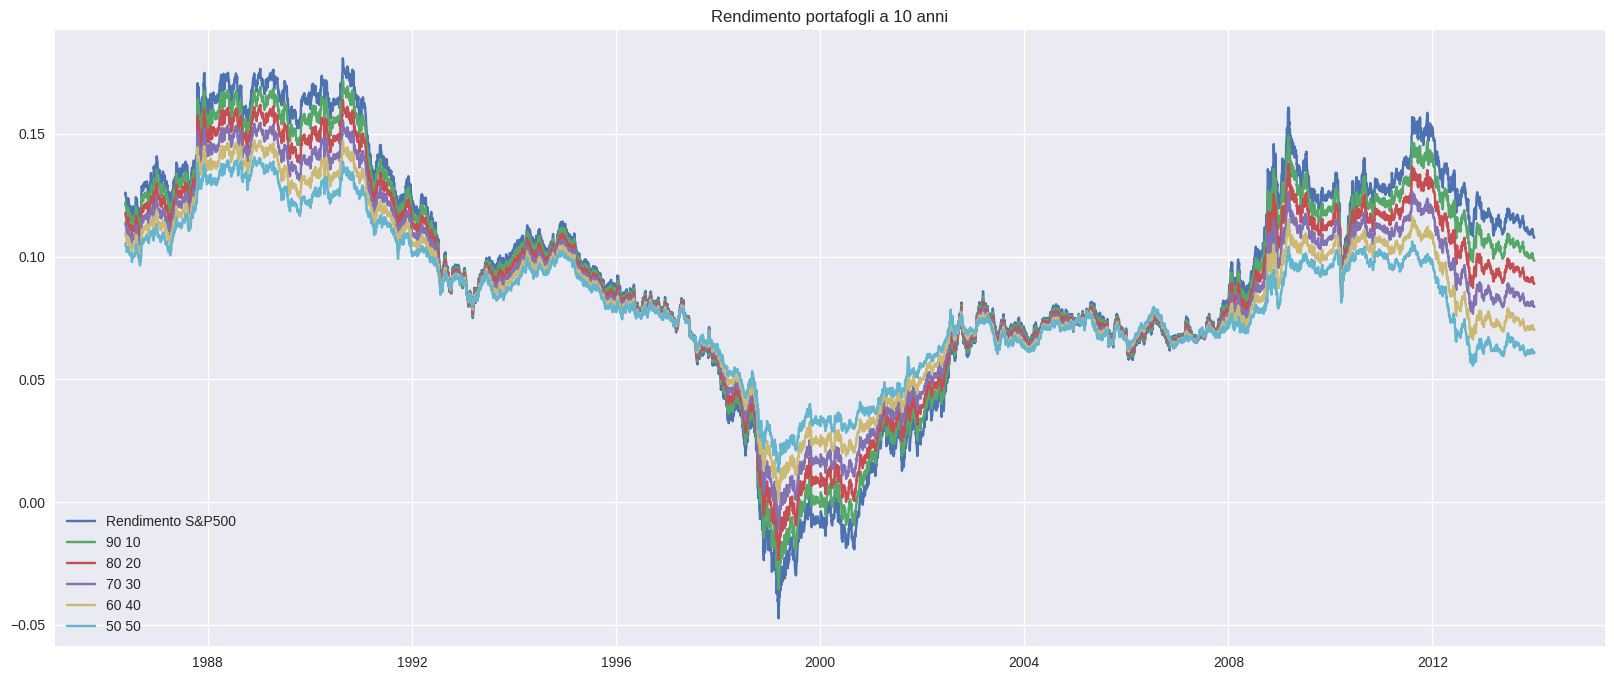

In [11]:
plt.figure(figsize=(20,8))
plt.plot(risultati.iloc[:,[0,5,6,7,8,9]], label=risultati.columns[[0,5,6,7,8,9]])
plt.legend()
plt.title(f'Rendimento portafogli a {durata} anni')
plt.show()

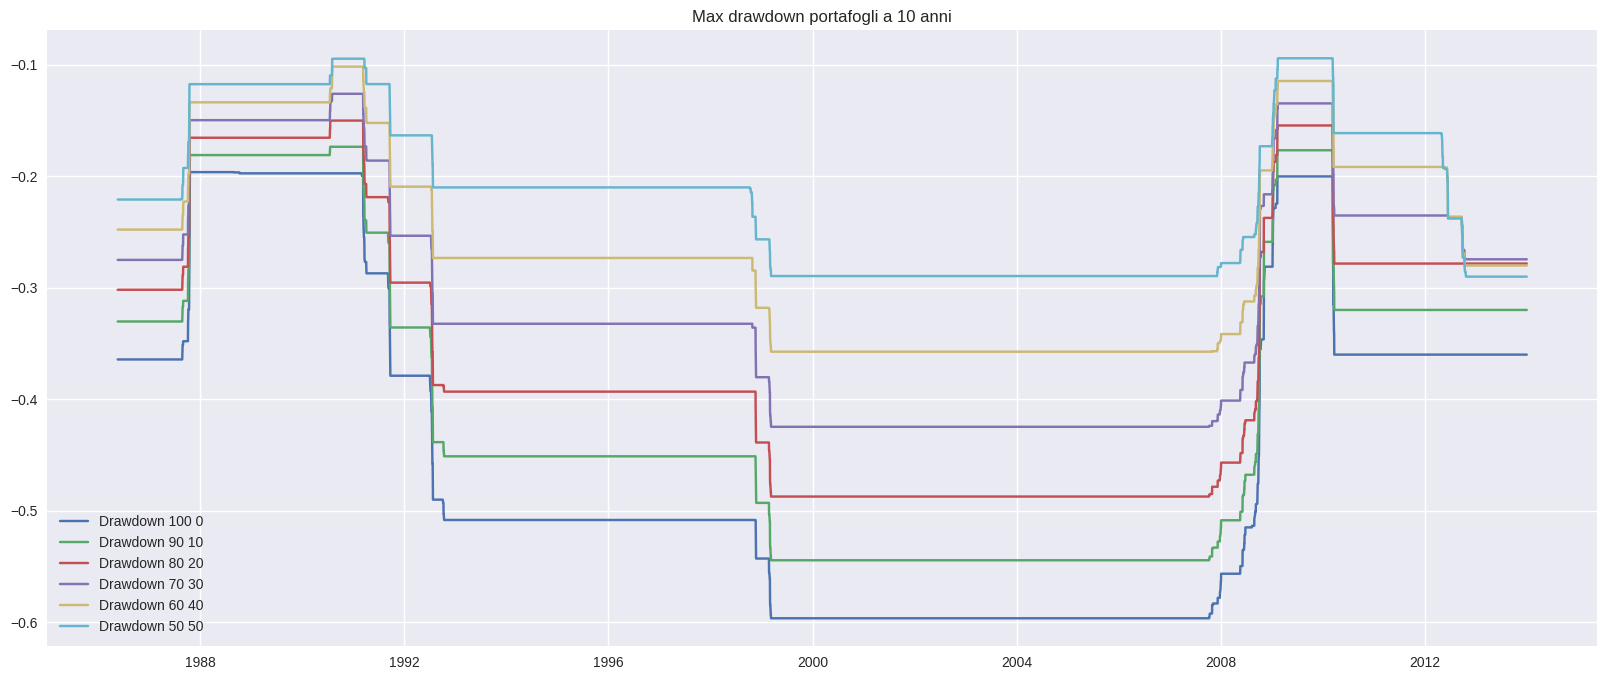

In [12]:
plt.figure(figsize=(20,8))
plt.plot(risultati.iloc[:,[10,11,12,13,14,15]], label=risultati.columns[[10,11,12,13,14,15]])
plt.legend()
plt.title(f'Max drawdown portafogli a {durata} anni')
plt.show()

In [13]:
risultati.iloc[:,[0,5,6,7,8,9]].describe()

,Rendimento S&P500,90 10,80 20,70 30,60 40,50 50
count,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000,6964.000000
mean,0.093524,0.091250,0.088975,0.086700,0.084425,0.082151
std,0.048697,0.044148,0.039709,0.035421,0.031348,0.027584
min,-0.047379,-0.035467,-0.023554,-0.011641,0.000272,0.012185
25%,0.068505,0.068277,0.068040,0.067992,0.067795,0.065472
50%,0.095575,0.093679,0.090903,0.084902,0.080552,0.078203
75%,0.128766,0.123069,0.117169,0.111319,0.105516,0.099894
max,0.180772,0.172352,0.163932,0.155513,0.147296,0.140468


In [14]:
delta = risultati.loc[:,'Rendimento S&P500']-risultati.loc[:,'Rendimento US Bonds']

In [15]:
prc = round(sum(1 for v in delta if v>0)/delta.count()*100,2)
print(f'Percentuale di investimenti lumpsum con rendimento azionario > obbligazionario a {durata} anni: {prc}%')

Percentuale di investimenti lumpsum con rendimento azionario > obbligazionario a 10 anni: 74.97%


In [16]:
delta.count()

6964

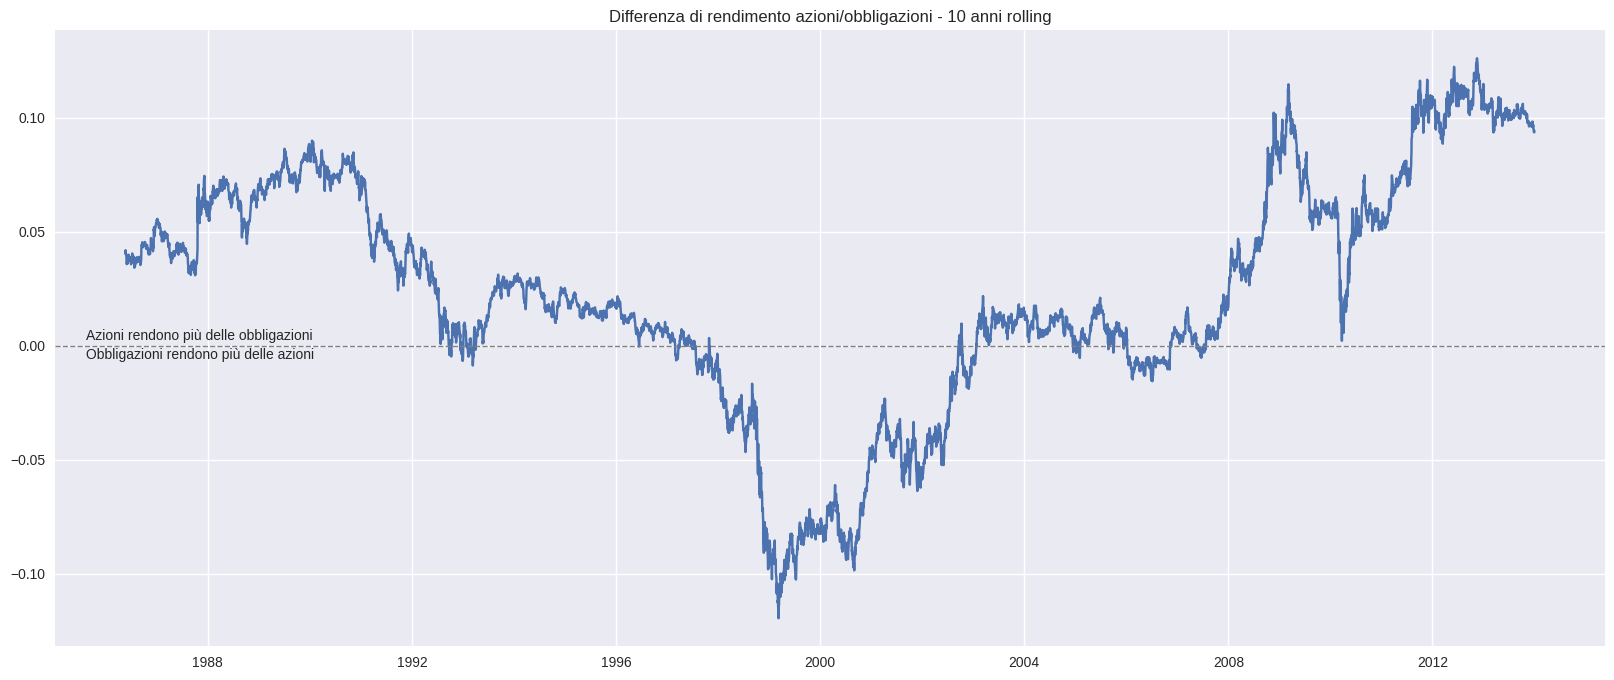

In [17]:
plt.figure(figsize=(20,8))
plt.plot(delta,label=nomi)
#plt.legend()
plt.title(f'Differenza di rendimento azioni/obbligazioni - {durata} anni rolling')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.text(5700, 0.001, 'Azioni rendono più delle obbligazioni',  va='bottom', fontsize=10)
plt.text(5700, -0.001, 'Obbligazioni rendono più delle azioni',  va='top', fontsize=10)
plt.show()

In [18]:
annual_rend = rend.resample('A').sum()
#annual_rend.index = annual_rend.index.year

In [19]:
annual_rend.describe()

,VFINX,VUSTX
count,38.000000,38.000000
mean,0.095325,0.057397
std,0.167359,0.121915
min,-0.462402,-0.350490
25%,0.014027,-0.014603
50%,0.132892,0.069636
75%,0.227904,0.148631
max,0.318083,0.264017


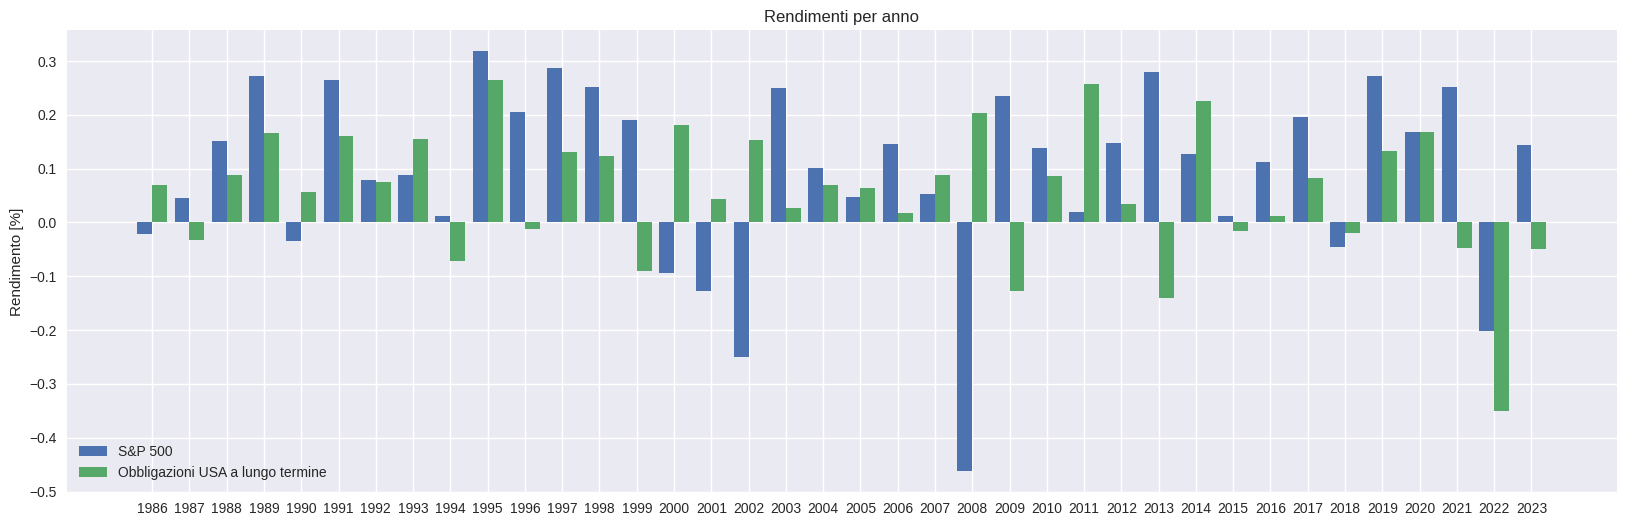

In [20]:
plt.figure(figsize=(20, 6))
plt.bar(annual_rend.index.year, annual_rend.iloc[:,0], width=-0.4, align='edge', label='S&P 500')
plt.bar(annual_rend.index.year, annual_rend.iloc[:,1], width=0.4, align='edge', label='Obbligazioni USA a lungo termine')

plt.ylabel('Rendimento [%]')
plt.title('Rendimenti per anno')
plt.legend()

plt.xticks(annual_rend.index.year)  # Imposta gli anni come etichette sull'asse x

plt.show()

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

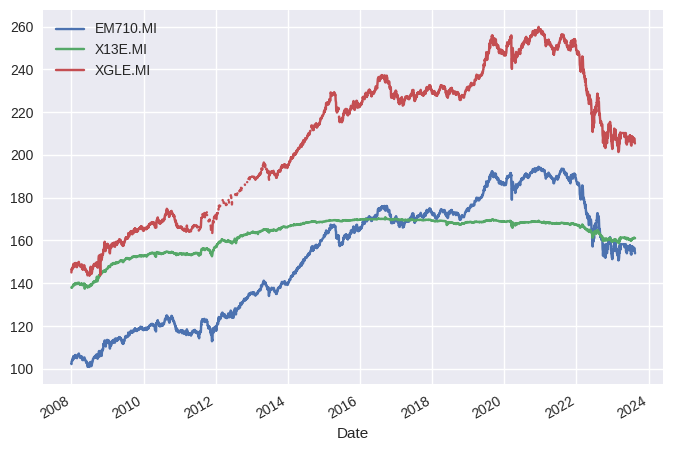

In [44]:
#bonds = [['CSBGE3.MI','Europa'],['IBTA.L','US non hedged'],['VDTE.DE','US hedged']]
#bonds = [['XGLE.MI','Europa'],['AGGH.MI','Globale hedged'],['AGG','Globale non hedged']]
bonds = [['X13E.MI','1-3y'],['XGLE.MI','5-7y'],['EM710.MI','7-10y']]

ticks = [l[0] for l in bonds]
nms = [l[1] for l in bonds]
pr = yf.download(ticks)['Adj Close']
ren = np.log(pr/pr.shift(1)).dropna()
ren = ren.reindex(ticks,axis=1)
pr.plot()

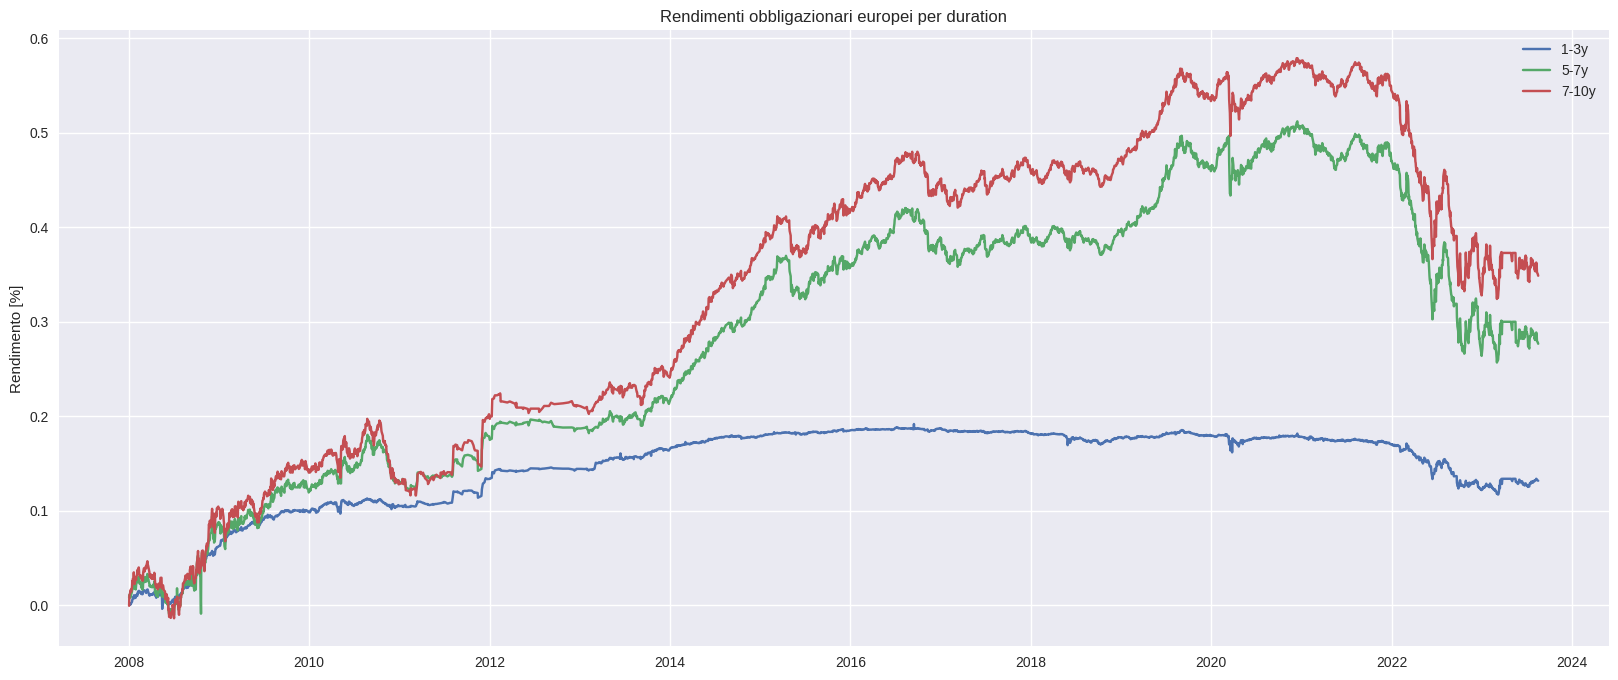

In [45]:
plt.figure(figsize=(20,8))
plt.plot(ren.cumsum(),label=nms)
plt.legend()
plt.title('Rendimenti obbligazionari europei per duration')
plt.ylabel('Rendimento [%]')
plt.show()

In [46]:
x = ren.resample('A').sum()
x.describe()

,X13E.MI,XGLE.MI,EM710.MI
count,16.000000,16.000000,16.000000
mean,0.008247,0.017304,0.021801
std,0.023542,0.068994,0.075876
min,-0.048372,-0.206541,-0.216589
25%,-0.001703,0.008211,0.010112
50%,0.006246,0.028487,0.030466
75%,0.015583,0.047275,0.047379
max,0.062406,0.109887,0.136368
